In [1]:
#import sys
#sys.path.insert(0, "/opt/simtool")
from simtool import get_inputs, Run, get_outputs, Experiment
import numpy as np

In [2]:
#nb = 'test_simtool.ipynb'
nb = 'test_simtool'
inputs = get_inputs(nb)
inputs.myarray.value = np.array([[1, 2.0, 3.14],[4,5,6]])

In [3]:
with Experiment('foo2'):
    with Experiment('foo', append=False):
        runs = []
        for mvolts in [100,200,300,400,500]:
            inputs.volts.value = mvolts
            if mvolts % 200:
                inputs.options.value = {'FontSize': 28, 'FontColor': 'red', 'Background': 'black'}
            else:
                inputs.options.value = {'FontSize': 28, 'FontColor': 'yellow', 'Background': 'black'}
            r = Run(nb, inputs, cache=False)
            runs.append(r)
    inputs.volts.value = '1 volt'
    inputs.options.value = {'FontSize': 28, 'FontColor': 'green', 'Background': 'darkgray'}
    r = Run(nb, inputs)
    runs.append(r)

In [4]:
for run in runs:
    print(run.inputs.volts.value)

100
200
300
400
500
1000.0


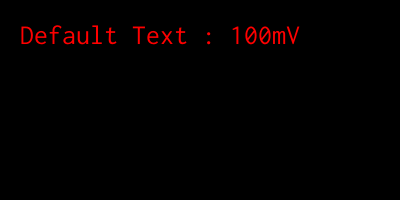

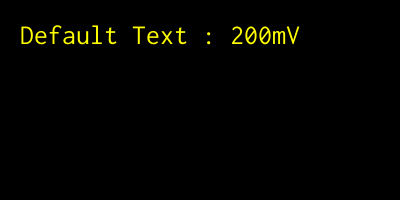

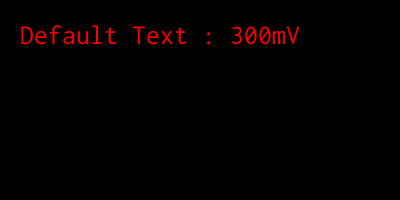

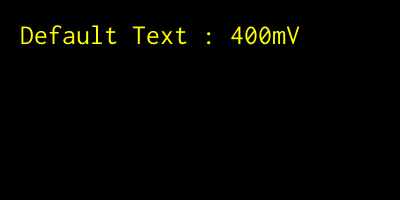

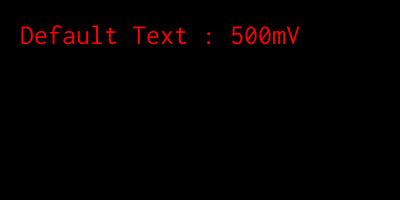

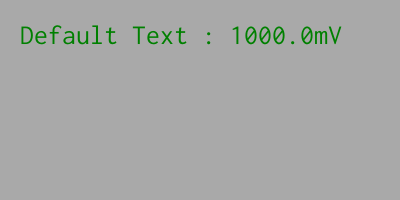

In [5]:
for run in runs:
    db = run.db
    db.read('PNG', display=True)